In [1]:
# Import the librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

In [2]:
# Read the .csv containing the dataset
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [3]:
# Remplace the ',' by the '.' symbol
df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [4]:
# Convert the first column to a datetime format
df['date'] = pd.to_datetime(df['date'])
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [5]:
# Convert all the other columns to numeric values
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [6]:
# Check the feature types
df.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

Text(0.5, 1.0, '% Silica Concentrate')

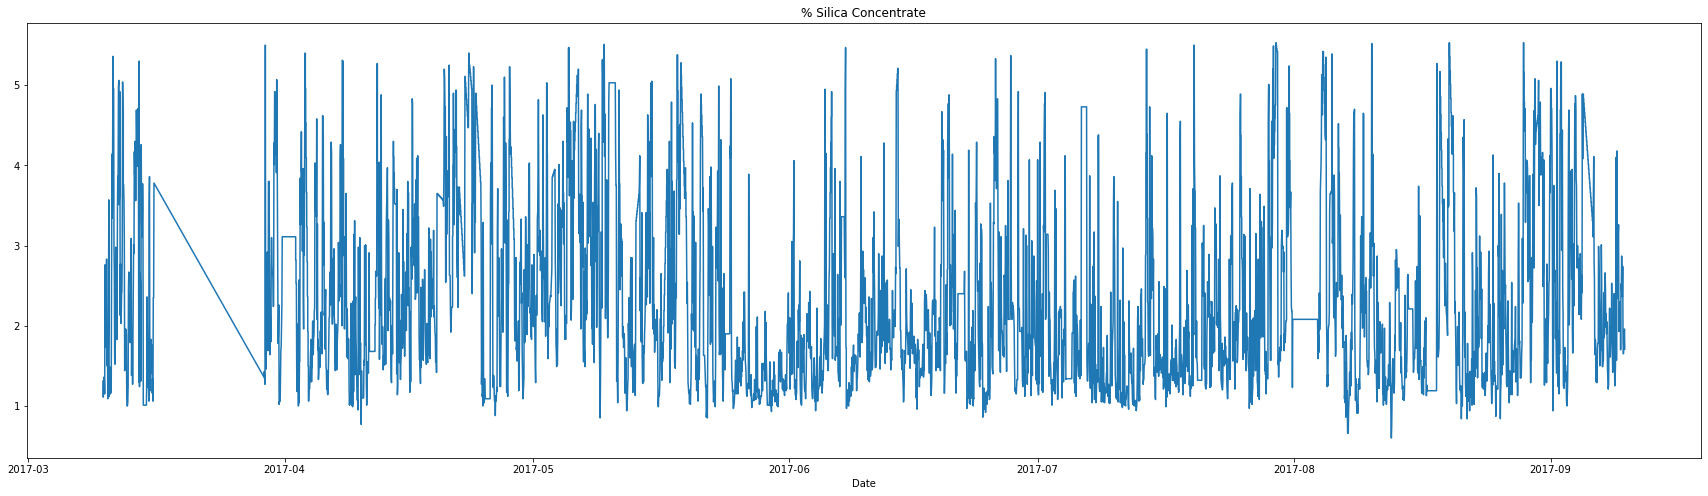

In [7]:
# Plot the percentage of silica in the concentrate against the time
plt.figure(figsize=(30,8))
plt.plot(df['date'], df['% Silica Concentrate'])
plt.xlabel('Date')
plt.title('% Silica Concentrate')

In [8]:
# Delete the maintenance period from the dataset
df = df.loc[df['date']>="2017-03-27 12:00:00"]
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
26814,2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
26815,2017-03-29 12:00:00,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,...,250.828,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36
26816,2017-03-29 12:00:00,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,...,250.653,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36
26817,2017-03-29 12:00:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,...,250.478,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36
26818,2017-03-29 12:00:00,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,...,250.304,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.653650,302.344,298.786,...,313.695,392.160000,430.702000,872.008000,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.653520,303.013,301.879,...,236.700,401.505000,404.616000,864.409000,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.653380,303.662,307.397,...,225.879,408.899000,399.316000,867.598000,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.653240,302.550,301.959,...,308.115,405.107000,466.832000,876.591000,407.299,502.301,340.844,433.966,64.27,1.71


Text(0.5, 1.0, '% Silica Concentrate')

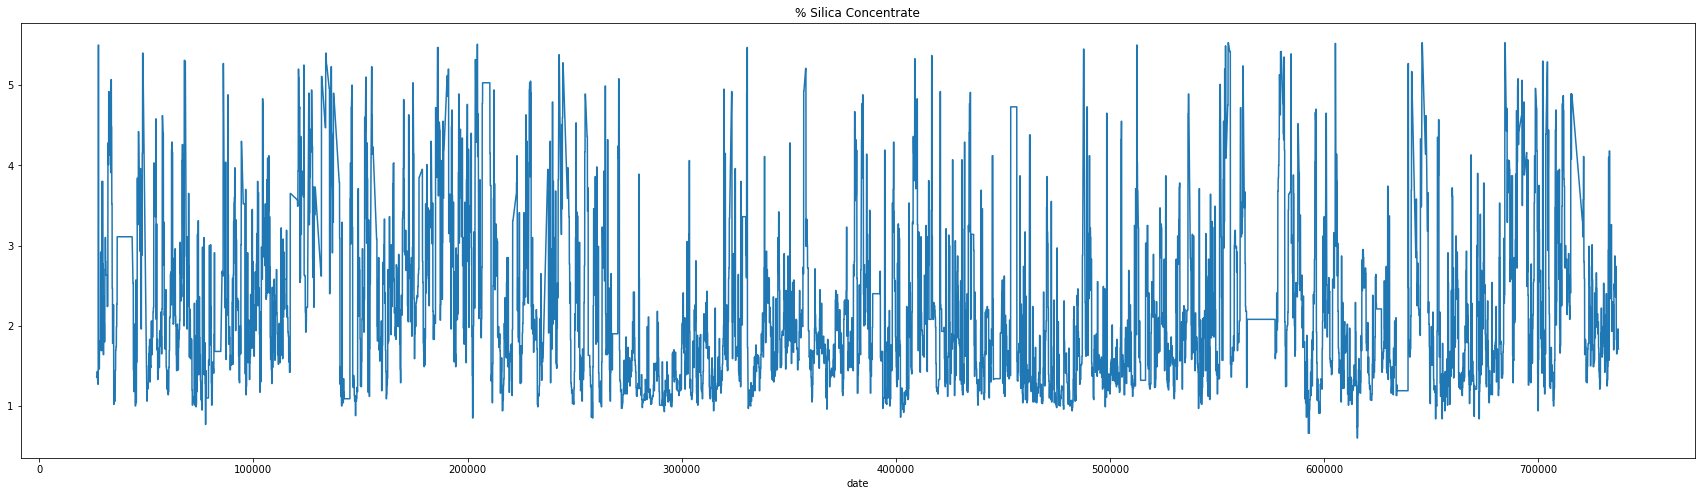

In [9]:
# Plot again the percentage of silica in the concentrate against the time
plt.figure(figsize=(30,8))
plt.plot(df['% Silica Concentrate'])
plt.xlabel('date')
plt.title('% Silica Concentrate')

In [10]:
# Drop the '% Iron Concentrate' column as it cannot be an input feature + group the samples by 20 minutes periods
df = df.drop('% Iron Concentrate', axis=1)
df = df.reset_index(drop=True)
df = df.groupby(df.index//30).median()
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,60.18,9.34,1998.300000,375.7900,400.689500,9.682895,1.560033,200.1990,196.3045,199.6840,...,250.1970,250.159000,592.608733,585.251266,882.280333,444.5595,454.9320,448.7880,460.0055,1.36
1,60.18,9.34,887.061094,407.4405,398.847500,9.568095,1.555570,200.1245,194.3155,199.4890,...,250.0595,250.177500,669.872733,653.518234,884.558716,457.6375,449.1090,460.8230,453.1655,1.36
2,60.18,9.34,533.597437,424.8995,398.398000,9.459190,1.577445,199.9510,196.4225,200.0435,...,249.9715,249.229000,747.136733,721.785201,885.623658,441.2990,451.8935,452.1615,449.3950,1.36
3,60.18,9.34,1519.712482,416.7245,398.182643,9.417755,1.556550,200.1100,195.8355,199.5250,...,250.0925,249.978000,824.400733,790.052168,879.846763,459.9630,456.5755,468.7775,458.0650,1.36
4,60.18,9.34,349.012220,344.8150,408.161706,9.453900,1.526116,199.9360,196.1735,199.2245,...,250.0345,250.049500,851.526045,812.198130,836.375932,615.0905,580.5915,569.4130,582.5209,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,49.75,23.20,4072.670000,454.3815,380.406000,9.672165,1.675325,298.9090,300.0805,299.5820,...,348.4730,341.285750,394.032500,506.733500,863.688000,400.6345,488.4280,395.8120,397.9995,1.71
23684,49.75,23.20,4679.535000,454.0390,382.217000,9.683530,1.667715,300.0850,301.0265,298.9855,...,350.4375,322.456400,398.530000,503.372500,860.591000,401.6875,509.4120,401.3595,403.7905,1.71
23685,49.75,23.20,3987.980000,475.0335,379.862333,9.662805,1.665265,300.4985,299.8930,299.9240,...,348.5700,324.463292,399.922000,501.850500,876.970000,400.7650,492.1610,397.3650,399.6430,1.71
23686,49.75,23.20,3253.450000,463.8835,381.941000,9.623885,1.656850,299.6570,300.5540,299.9610,...,350.2900,305.342700,403.054500,496.968000,883.652000,403.4155,503.4405,404.5710,400.6525,1.71


In [11]:
# Define the split between the training and testing datasets
df_train = df.iloc[:19000,:]
df_test = df.iloc[19000:,:]

In [12]:
# Plot the training dataset
df_train

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,60.18,9.34,1998.300000,375.7900,400.689500,9.682895,1.560033,200.1990,196.3045,199.6840,...,250.1970,250.1590,592.608733,585.251266,882.280333,444.5595,454.9320,448.7880,460.0055,1.36
1,60.18,9.34,887.061094,407.4405,398.847500,9.568095,1.555570,200.1245,194.3155,199.4890,...,250.0595,250.1775,669.872733,653.518234,884.558716,457.6375,449.1090,460.8230,453.1655,1.36
2,60.18,9.34,533.597437,424.8995,398.398000,9.459190,1.577445,199.9510,196.4225,200.0435,...,249.9715,249.2290,747.136733,721.785201,885.623658,441.2990,451.8935,452.1615,449.3950,1.36
3,60.18,9.34,1519.712482,416.7245,398.182643,9.417755,1.556550,200.1100,195.8355,199.5250,...,250.0925,249.9780,824.400733,790.052168,879.846763,459.9630,456.5755,468.7775,458.0650,1.36
4,60.18,9.34,349.012220,344.8150,408.161706,9.453900,1.526116,199.9360,196.1735,199.2245,...,250.0345,250.0495,851.526045,812.198130,836.375932,615.0905,580.5915,569.4130,582.5209,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,48.81,25.31,3832.705000,597.0830,379.707250,10.349100,1.765950,304.6295,299.8735,299.1965,...,250.2955,249.7430,345.557500,500.353500,602.462500,368.9220,331.3815,347.3135,341.4900,1.54
18996,48.81,25.31,3964.940000,609.1585,379.764000,10.310800,1.779940,301.8615,301.1380,299.4870,...,249.9740,250.1300,175.412472,505.206500,600.003500,362.8040,357.2790,354.1585,345.9720,1.07
18997,48.81,25.31,3808.865000,617.1850,381.510500,10.226650,1.792015,300.3925,299.6605,299.7220,...,249.8350,250.1325,222.838639,495.143000,603.472000,349.4095,347.5905,352.3975,351.9185,1.07
18998,48.81,25.31,3422.750000,622.7720,380.630000,10.157800,1.795330,301.0490,299.9500,299.2900,...,250.2285,249.8225,591.418000,498.896000,603.597000,351.5135,321.3575,348.9250,347.7485,1.07


In [13]:
# Normalize the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
variables = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',	'Flotation Column 04 Air Flow',	'Flotation Column 05 Air Flow',	'Flotation Column 06 Air Flow',	'Flotation Column 07 Air Flow',	'Flotation Column 01 Level',	'Flotation Column 02 Level',	'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']

x_transformer = scaler
x_transformer = scaler.fit(df_train.loc[:, variables].to_numpy())

df_train_std = df_train.copy()
df_train_std.loc[:, variables] = x_transformer.transform(df_train_std.loc[:, variables].to_numpy())
df_test_std = df_test.copy()
df_test_std.loc[:, variables] = x_transformer.transform(df_test_std.loc[:, variables].to_numpy())

y_transformer = scaler
y_transformer = y_transformer.fit(df_train[['% Silica Concentrate']])

df_train_std.loc[:,['% Silica Concentrate']] = y_transformer.transform(df_train_std.loc[:,['% Silica Concentrate']])
df_test_std.loc[:,['% Silica Concentrate']] = y_transformer.transform(df_test_std.loc[:,['% Silica Concentrate']])
df_train_std

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,0.796305,0.193446,0.317622,0.269615,0.576244,0.452402,0.120699,0.131280,0.144075,0.135120,...,0.329287,0.377449,0.621526,0.605736,0.994064,0.545830,0.566604,0.533722,0.585811,0.143737
1,0.796305,0.193446,0.140919,0.333256,0.532570,0.396516,0.107299,0.130879,0.129366,0.133982,...,0.328495,0.377559,0.730151,0.716403,0.997063,0.571152,0.555132,0.556185,0.571583,0.143737
2,0.796305,0.193446,0.084713,0.368362,0.521912,0.343501,0.172977,0.129946,0.144947,0.137220,...,0.327989,0.371933,0.838777,0.827069,0.998464,0.539517,0.560618,0.540019,0.563740,0.143737
3,0.796305,0.193446,0.241520,0.351924,0.516806,0.323330,0.110241,0.130801,0.140607,0.134192,...,0.328685,0.376376,0.947402,0.937736,0.990861,0.575655,0.569842,0.571031,0.581775,0.143737
4,0.796305,0.193446,0.055361,0.207333,0.753412,0.340926,0.018865,0.129865,0.143106,0.132437,...,0.328351,0.376800,0.985538,0.973637,0.933651,0.876022,0.814182,0.758858,0.840658,0.143737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,0.257698,0.756166,0.609320,0.714577,0.078750,0.776715,0.738944,0.692954,0.909953,0.716257,...,0.329854,0.374982,0.274196,0.468109,0.625805,0.399376,0.323182,0.344329,0.339285,0.180698
18996,0.257698,0.756166,0.630347,0.738858,0.080096,0.758070,0.780947,0.678067,0.919304,0.717953,...,0.328003,0.377277,0.034989,0.475976,0.622568,0.387530,0.374206,0.357105,0.348608,0.084189
18997,0.257698,0.756166,0.605529,0.754997,0.121506,0.717106,0.817201,0.670166,0.908378,0.719326,...,0.327203,0.377292,0.101666,0.459663,0.627133,0.361595,0.355117,0.353818,0.360977,0.084189
18998,0.257698,0.756166,0.544131,0.766231,0.100629,0.683589,0.827154,0.673697,0.910519,0.716803,...,0.329468,0.375453,0.619852,0.465747,0.627298,0.365669,0.303432,0.347337,0.352303,0.084189


In [14]:
# Plot the statistics
df_train_std.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,...,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000
mean,0.638527,0.358974,0.452609,0.501381,0.549821,0.521272,0.475007,0.545769,0.717538,0.594345,...,0.551307,0.607869,0.527568,0.515138,0.536295,0.499959,0.508638,0.496763,0.505250,0.341648
std,0.246937,0.235817,0.183600,0.178474,0.143004,0.169166,0.214875,0.165477,0.224811,0.174486,...,0.150852,0.153741,0.189649,0.214770,0.204182,0.154339,0.149753,0.141384,0.153926,0.228918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456656,0.084919,0.325872,0.399202,0.525288,0.407631,0.363385,0.399600,0.540963,0.428630,...,0.338298,0.390932,0.359105,0.379571,0.362269,0.371819,0.369484,0.358226,0.366116,0.164271
50%,0.628612,0.336857,0.472268,0.534981,0.558924,0.526355,0.528648,0.665653,0.899280,0.717372,...,0.614185,0.670288,0.487276,0.463760,0.487448,0.470884,0.467844,0.471094,0.472695,0.277207
75%,0.978683,0.528541,0.586891,0.629012,0.592568,0.639022,0.628763,0.668095,0.910926,0.720213,...,0.617054,0.673729,0.632288,0.630337,0.623958,0.637402,0.640023,0.597759,0.591857,0.482546
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Create a dataset containing the previous values of the features for a specified number of previous time steps
def create_dataset(X, y, time_steps=1):
    """
    Input:
    - X: a pandas DataFrame or Series containing the input data
    - y: a pandas DataFrame or Series containing the target data
    - time_steps (optional): an integer specifying the number of time steps to include in each sample of the dataset

    Output:
    - Xs: a numpy array of shape (num_samples, time_steps, num_features) containing the input data for the model
    - ys: a numpy array of shape (num_samples,) containing the target data for the model
    """
    Xs,ys = [],[]
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])   
    return np.array(Xs), np.array(ys)

In [16]:
# Create the datasets to train and test the model using samples containing the 22 features values for 24 last time points
time_steps = 24
x_train, y_train = create_dataset(df_train_std, df_train_std['% Silica Concentrate'], time_steps)
x_test, y_test = create_dataset(df_test_std, df_test_std['% Silica Concentrate'], time_steps)

In [17]:
# Check the shapes for x
print("Shape of input training dataset: {}".format(x_train.shape))
print("Shape of input test dataset: {}".format(x_test.shape))

Shape of input training dataset: (18976, 24, 22)
Shape of input test dataset: (4664, 24, 22)


In [18]:
# Check the shapes for y
print("Shape of output training dataset: {}".format(y_train.shape))
print("Shape of output test dataset: {}".format(y_test.shape))

Shape of output training dataset: (18976,)
Shape of output test dataset: (4664,)


In [19]:
# Generate a positional encoding for a given maximum sequence length and embedding dimension
def positional_encoding(max_length, embedding_dim):
    """
    Input:
    - max_length: an integer specifying the maximum length of the sequence
    - embedding_dim: an integer specifying the size of the embedding dimension

    Output:
    - A numpy array of shape (max_length, embedding_dim) containing the positional encoding
    """
    pos_encoding = np.zeros((max_length, embedding_dim))
    for i in range(max_length):
        for j in range(embedding_dim):
            pos_encoding[i, j] = np.sin((i+1)/(10000**(2*j/embedding_dim)))
    return pos_encoding

In [20]:
# Implement a transformer encoder block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    """
    Input:
    - inputs: a tensor of shape (batch_size, sequence_length, num_features) containing the input data
    - head_size: an integer specifying the size of the attention heads
    - num_heads: an integer specifying the number of attention heads
    - ff_dim: an integer specifying the size of the feedforward block
    - dropout (optional): a float in the range [0, 1] specifying the dropout rate

    Output:
    - A tensor of shape (batch_size, sequence_length, num_features) containing the output of the transformer encoder
      layer
    """
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [21]:
# Build a model for time series prediction using a transformer encoder
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0,):
    """
    Input:
    - input_shape: a tuple of integers specifying the shape of the input data (batch_size, sequence_length, num_features)
    - head_size: an integer specifying the size of the attention heads in the transformer encoder block
    - num_heads: an integer specifying the number of attention heads in the transformer encoder block
    - ff_dim: an integer specifying the size of the feedforward block in the transformer encoder block
    - num_transformer_blocks: an integer specifying the number of transformer blocks in the transformer encoder block
    - mlp_units: a list of integers specifying the number of units in the fully-connected layers of the MLP
    - dropout (optional): a float in the range [0, 1] specifying the dropout rate for the transformer encoder block
    - mlp_dropout (optional): a float in the range [0, 1] specifying the dropout rate for the MLP

    Output:
    - A Keras model object
    """
    inputs = keras.Input(shape=input_shape)
    x = inputs
    x = x + positional_encoding(time_steps, input_shape[1])
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [22]:
# Build the model and print a model summary 
input_shape = x_train.shape[1:]
model = build_model(input_shape,head_size=256,num_heads=4,ff_dim=4,num_transformer_blocks=8,mlp_units=[128],mlp_dropout=0.4,dropout=0.4)
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 22)]     0           []                               
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 24, 22)      0           ['input_1[0][0]']                
 da)                                                                                              
                                                                                                  
 layer_normalization (LayerNorm  (None, 24, 22)      44          ['tf.__operators__.add[0][0]']   
 alization)                                                                                       
                                                                                              

 dropout_6 (Dropout)            (None, 24, 22)       0           ['multi_head_attention_3[0][0]'] 
                                                                                                  
 tf.__operators__.add_7 (TFOpLa  (None, 24, 22)      0           ['dropout_6[0][0]',              
 mbda)                                                            'tf.__operators__.add_6[0][0]'] 
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 24, 22)      44          ['tf.__operators__.add_7[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv1d_6 (Conv1D)              (None, 24, 4)        92          ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_7

 tf.__operators__.add_14 (TFOpL  (None, 24, 22)      0           ['conv1d_13[0][0]',              
 ambda)                                                           'tf.__operators__.add_13[0][0]']
                                                                                                  
 layer_normalization_14 (LayerN  (None, 24, 22)      44          ['tf.__operators__.add_14[0][0]']
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_7 (MultiH  (None, 24, 22)      93206       ['layer_normalization_14[0][0]', 
 eadAttention)                                                    'layer_normalization_14[0][0]'] 
                                                                                                  
 dropout_14 (Dropout)           (None, 24, 22)       0           ['multi_head_attention_7[0][0]'] 
          

In [23]:
# Train the model
model.fit(x_train, y_train, batch_size=64, validation_split=0.4, shuffle=False, epochs=20, callbacks=callbacks, verbose=1)

Epoch 1/20
178/178 [==============================] - 161s 866ms/step - loss: 0.0821 - val_loss: 0.0565
Epoch 2/20
178/178 [==============================] - 169s 952ms/step - loss: 0.0378 - val_loss: 0.0220
Epoch 3/20
178/178 [==============================] - 169s 953ms/step - loss: 0.0270 - val_loss: 0.0256
Epoch 4/20
178/178 [==============================] - 172s 970ms/step - loss: 0.0200 - val_loss: 0.0182
Epoch 5/20
178/178 [==============================] - 170s 958ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 6/20
178/178 [==============================] - 166s 935ms/step - loss: 0.0136 - val_loss: 0.0160
Epoch 7/20
178/178 [==============================] - 168s 947ms/step - loss: 0.0127 - val_loss: 0.0153
Epoch 8/20
178/178 [==============================] - 168s 943ms/step - loss: 0.0141 - val_loss: 0.0156
Epoch 9/20
178/178 [==============================] - 175s 987ms/step - loss: 0.0126 - val_loss: 0.0138
Epoch 10/20
178/178 [==============================] - 168s 943m

In [24]:
# Perform the predictions and check the model performances
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Test score with Transformer Encoders (RMSE): {}".format(score))
score = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Train score with Transformer Encoders (RMSE): {}".format(score))

146/146 [==============================] - 22s 147ms/step
Test score with Transformer Encoders (RMSE): 0.10191322924750419
Train score with Transformer Encoders (RMSE): 0.09633739093124254


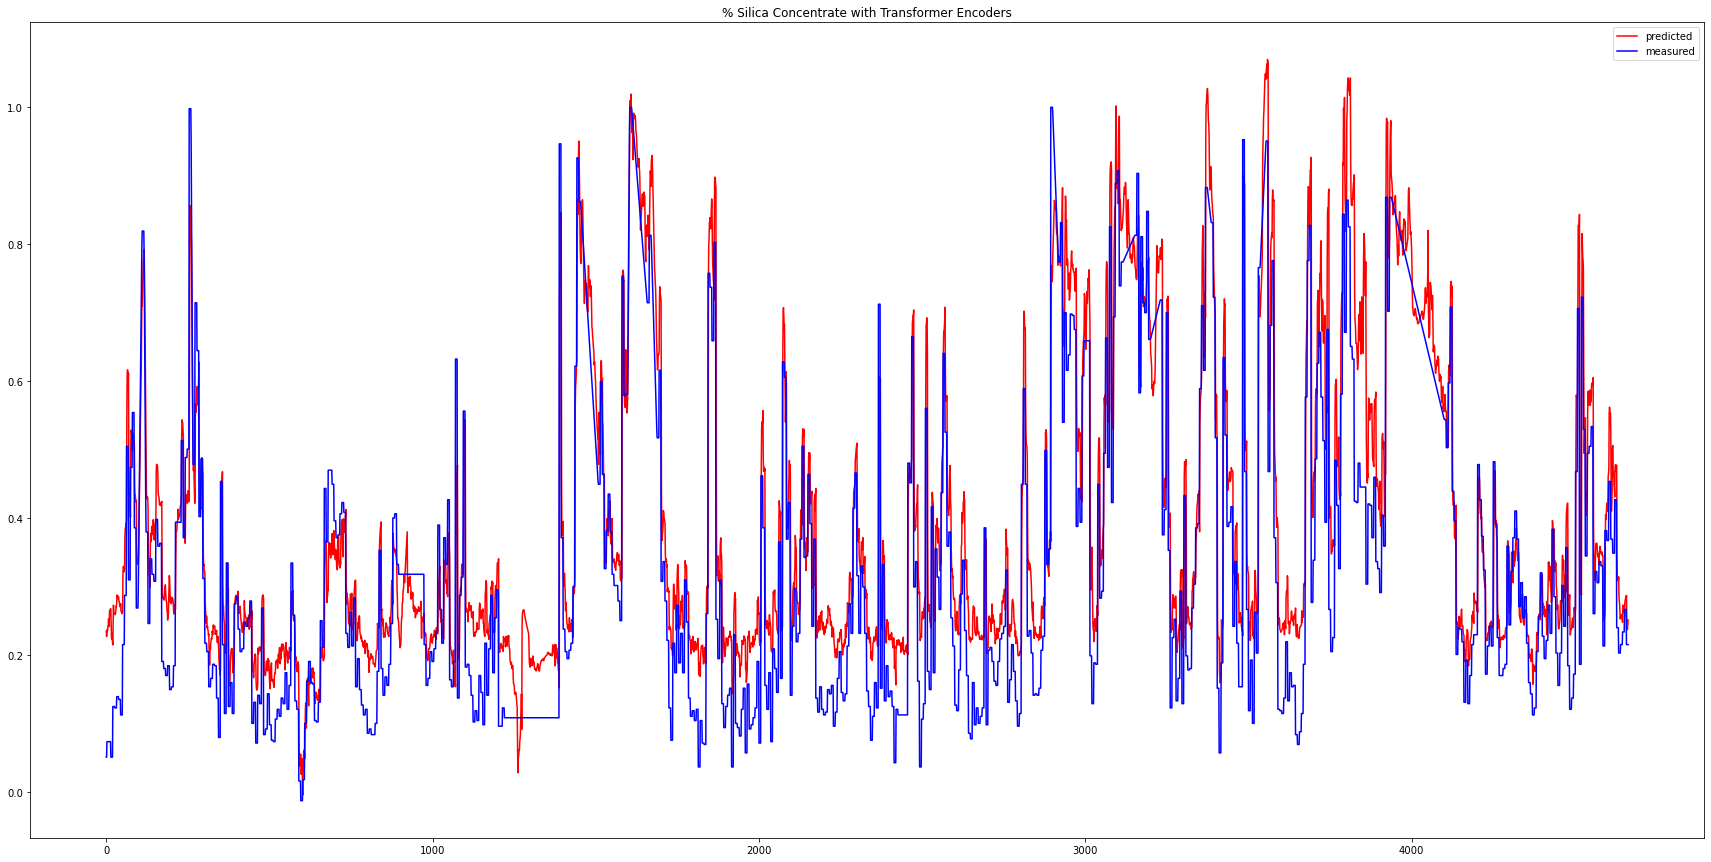

In [25]:
# Plot the predicted values against the real ones
plt.figure(figsize=(30, 15))
plt.title('% Silica Concentrate with Transformer Encoders')
plt.plot(pred_test.ravel(), color='red', label='predicted')
plt.plot(y_test, color='blue', label='measured')
plt.legend()
plt.show()

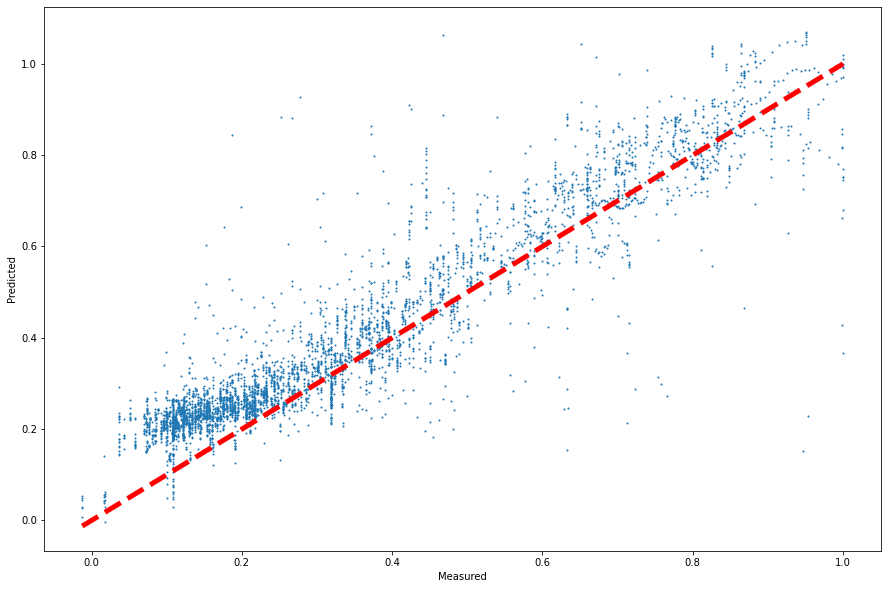

In [26]:
# Plot the measured values against the predicted ones and observe the dispersion 
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y_test, pred_test, s=1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=5)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [27]:
# Create a one layer LSTM model and print the model summary
model = Sequential()
model.add(LSTM(4, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.add(Dropout(rate=0.2))
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [EarlyStopping(patience=10, restore_best_weights=True)]
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 432       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
 dropout_17 (Dropout)        (None, 1)                 0         
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.4, shuffle=False, callbacks=callbacks, verbose=1)

Epoch 1/50
178/178 [==============================] - 3s 9ms/step - loss: 0.1128 - val_loss: 0.0517
Epoch 2/50
178/178 [==============================] - 1s 7ms/step - loss: 0.0838 - val_loss: 0.0439
Epoch 3/50
178/178 [==============================] - 1s 7ms/step - loss: 0.0759 - val_loss: 0.0380
Epoch 4/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0708 - val_loss: 0.0331
Epoch 5/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0623 - val_loss: 0.0286
Epoch 6/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0582 - val_loss: 0.0239
Epoch 7/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0516 - val_loss: 0.0187
Epoch 8/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0489 - val_loss: 0.0151
Epoch 9/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0459 - val_loss: 0.0132
Epoch 10/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0441 - val_loss: 0.0120

In [29]:
# Perform the predictions and check the model performances
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred_test,y_test))
print("Test score with Transformer Encoders (RMSE): {}".format(score))
score = np.sqrt(metrics.mean_squared_error(pred_train,y_train))
print("Train score with Transformer Encoders (RMSE): {}".format(score))

146/146 [==============================] - 1s 2ms/step
Test score with Transformer Encoders (RMSE): 0.10496963089188908
Train score with Transformer Encoders (RMSE): 0.10152589540405424


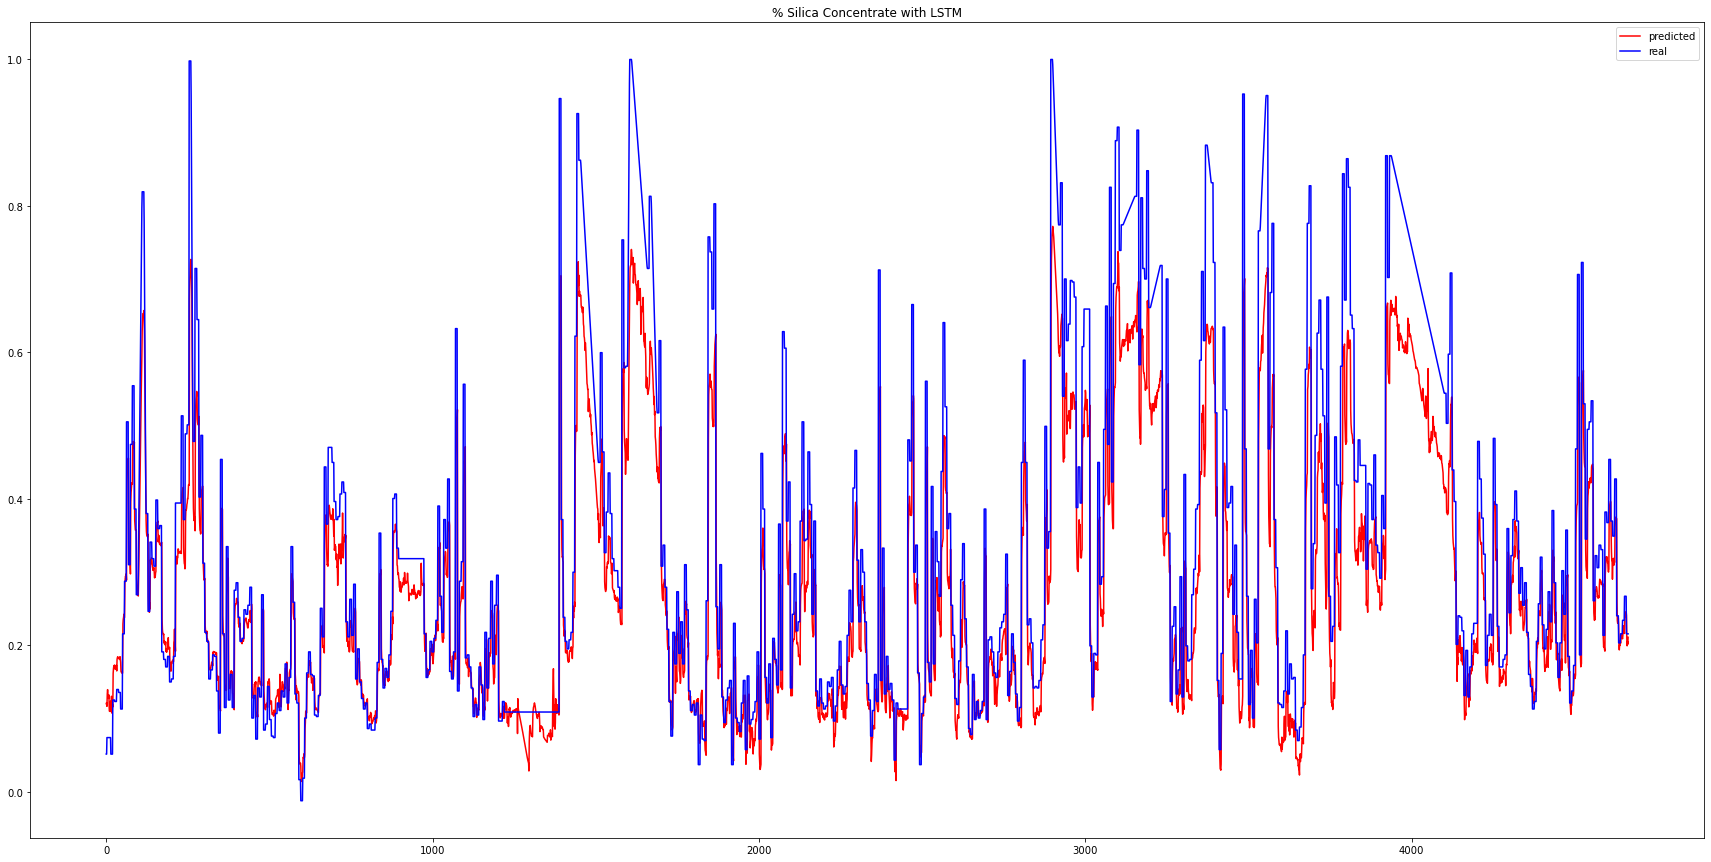

In [30]:
# Plot the predicted values against the real ones
plt.figure(figsize=(30, 15))
plt.title('% Silica Concentrate with LSTM')
plt.plot(pred_test.ravel(), color='red', label='predicted')
plt.plot(y_test, color='blue', label='real')
plt.legend()
plt.show()

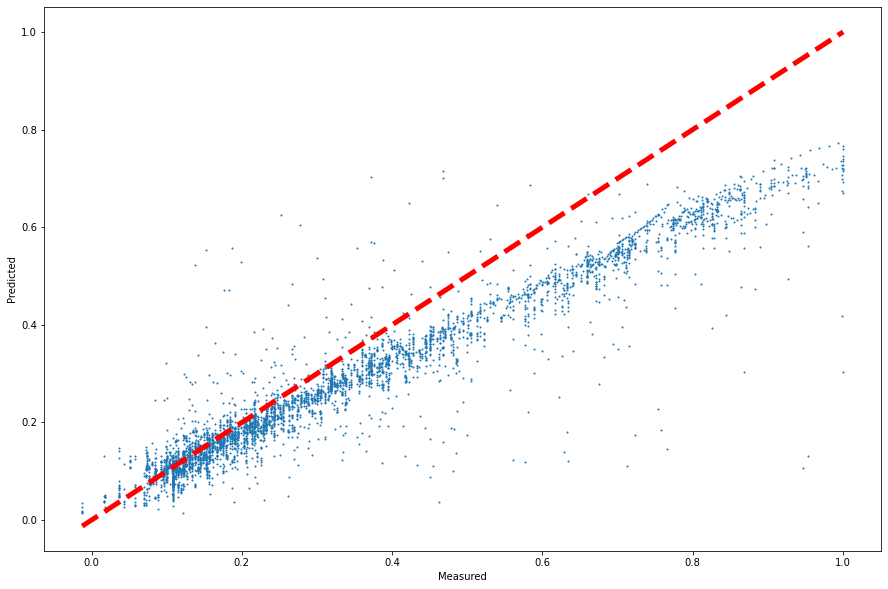

In [31]:
# Plot the measured values against the predicted ones and observe the dispersion 
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y_test, pred_test, s=1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=5)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()